### 单车预测器

#### 数据集

[Bike Share数据集](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

该数据是从2011年1月1日到2012年12月31日之间某地的单车使用情况。一条数据记录了一个小时内某一个地点的星期几、是否是假期、天气和风速等情况，以及该地区的单车使用量（用cnt变量记载）。

#### 神经网络

人工神经网络也被称为通用拟合器，这是因为它可以拟合任意的函数或映射。

前馈神经网络一般包括3层人工神经元，即输入层、隐含层和输出层，其中，隐含层可以包含多层，这就构成了所谓的深度神经网络。

神经网络的运行通常包含前馈的预测过程（或称为决策过程）和反馈的学习过程。

可以粗略的认为两个神经元可以用来逼近一个波峰（波谷）。事实上，已从理论上证明，用有限多的隐含层神经元可以逼近任意的有限区间内的曲线，这叫作通用逼近定理。

#### 失败的神经预测器

In [31]:
import torch
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_path = 'E:/ai_learning_resource/bikeshare/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)
rides.head()  # 输出部分数据

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Text(0, 0.5, 'Y')

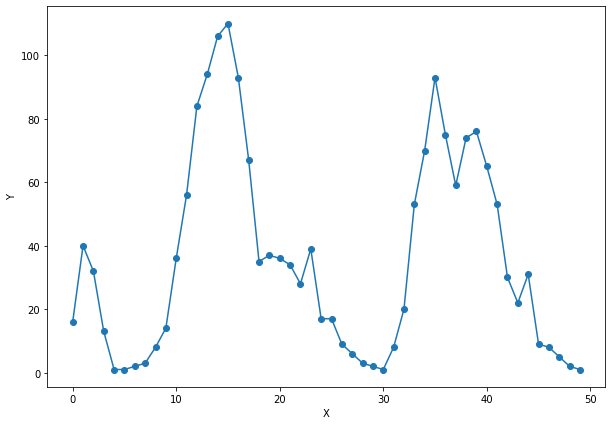

In [32]:
counts = rides['cnt'][:50]
x = np.arange(len(counts))
y = np.array(counts)
plt.figure(figsize=(10, 7))
plt.plot(x, y, 'o-')
plt.xlabel('X')
plt.ylabel('Y')

In [33]:
x = torch.Tensor(np.arange(len(counts)) / len(counts))
y = torch.Tensor(np.array(counts))
sz = 10  # 隐含层神经元的数量
weights = torch.randn([1, sz], requires_grad=True)  # 初始化输入层到隐含层的权重矩阵
biases = torch.randn(sz, requires_grad=True)  # 隐含层偏置
weights2 = torch.randn([sz, 1], requires_grad=True)  # 隐含层到输出层的权重矩阵

In [34]:
learning_rate = 0.001
losses = []
for i in range(20000):
    hidden = x.expand(sz, len(x)).t() * weights.expand(len(x), sz) + biases.expand(len(x), sz)
    
    hidden_ = torch.sigmoid(hidden)
    predictions = hidden_@weights2
    
    loss = torch.mean((predictions - y) ** 2)
    losses.append(loss.data.numpy())
    
    if i % 1000 == 0:
        print('hidden', hidden)
        print('pred:', predictions)
        print('loss:', loss.t())
    
    loss.backward()
    
    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    
    if i % 100 == 0:
        print('[+] ', (- learning_rate * weights.grad.data))
        print('[+] ', weights.data)
        print('[-] ', (- learning_rate * biases.grad.data))
        print('[-] ', biases.data)
    
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
    
    if i % 100 == 0:
        print('[*] ', weights.data)
        print('[*] ', biases.data)

hidden tensor([[ 2.2250e+00, -6.9414e-01, -1.2301e+00,  1.5920e+00,  1.1221e+00,
          4.2253e-01, -3.4912e-01, -2.4459e+00, -8.5031e-01,  5.9510e-01],
        [ 2.2249e+00, -6.5191e-01, -1.2144e+00,  1.6083e+00,  1.1442e+00,
          4.2976e-01, -3.4039e-01, -2.3917e+00, -8.5584e-01,  6.3029e-01],
        [ 2.2249e+00, -6.0969e-01, -1.1986e+00,  1.6245e+00,  1.1662e+00,
          4.3698e-01, -3.3167e-01, -2.3376e+00, -8.6137e-01,  6.6549e-01],
        [ 2.2248e+00, -5.6746e-01, -1.1829e+00,  1.6408e+00,  1.1882e+00,
          4.4420e-01, -3.2294e-01, -2.2834e+00, -8.6689e-01,  7.0069e-01],
        [ 2.2248e+00, -5.2523e-01, -1.1671e+00,  1.6570e+00,  1.2102e+00,
          4.5143e-01, -3.1421e-01, -2.2292e+00, -8.7242e-01,  7.3589e-01],
        [ 2.2247e+00, -4.8301e-01, -1.1514e+00,  1.6732e+00,  1.2323e+00,
          4.5865e-01, -3.0549e-01, -2.1751e+00, -8.7795e-01,  7.7108e-01],
        [ 2.2247e+00, -4.4078e-01, -1.1357e+00,  1.6895e+00,  1.2543e+00,
          4.6588e-01, -2.

[+]  tensor([[-1.2380e-04, -1.9724e-05, -1.2870e-04, -6.7710e-05, -8.0215e-05,
         -1.6720e-04, -1.3531e-04, -2.1886e-04,  3.9499e-05, -5.1395e-05]])
[+]  tensor([[ 0.3165,  2.8172,  1.7187,  1.2782,  1.4285,  0.8601,  1.2481,  3.1373,
         -0.7071,  2.0852]])
[-]  tensor([ 5.1914e-05,  5.0052e-04,  3.9934e-04,  1.7823e-04,  2.3318e-04,
         1.8857e-04,  2.7515e-04,  5.1467e-05, -3.4077e-05,  3.4297e-04])
[-]  tensor([ 3.0820,  1.5450,  1.2492,  2.9378,  2.1959,  1.8599,  1.8258, -1.3701,
        -1.8662,  1.7673])
[*]  tensor([[ 0.3165,  2.8172,  1.7187,  1.2782,  1.4285,  0.8601,  1.2481,  3.1373,
         -0.7071,  2.0852]])
[*]  tensor([ 3.0820,  1.5450,  1.2492,  2.9378,  2.1959,  1.8599,  1.8258, -1.3701,
        -1.8662,  1.7673])
[+]  tensor([[-1.2102e-04, -1.8018e-05, -1.2168e-04, -6.5171e-05, -7.6873e-05,
         -1.6204e-04, -1.2979e-04, -2.0828e-04,  3.8121e-05, -4.8529e-05]])
[+]  tensor([[ 0.3043,  2.8153,  1.7062,  1.2716,  1.4206,  0.8436,  1.2349,  3.1159

[+]  tensor([[-1.0825e-04, -1.1309e-05, -9.3218e-05, -5.3926e-05, -6.2404e-05,
         -1.3927e-04, -1.0619e-04, -1.6241e-04,  3.2020e-05, -3.6629e-05]])
[+]  tensor([[ 0.2471,  2.8081,  1.6531,  1.2420,  1.3861,  0.7687,  1.1763,  3.0239,
         -0.6857,  2.0592]])
[-]  tensor([ 3.5967e-05,  3.4866e-04,  2.9241e-04,  1.3598e-04,  1.7534e-04,
         1.3783e-04,  2.0255e-04,  2.9709e-05, -2.6706e-05,  2.5102e-04])
[-]  tensor([ 3.1078,  1.7947,  1.4534,  3.0308,  2.3166,  1.9562,  1.9668, -1.3467,
        -1.8842,  1.9426])
[*]  tensor([[ 0.2471,  2.8081,  1.6531,  1.2420,  1.3861,  0.7687,  1.1763,  3.0239,
         -0.6857,  2.0592]])
[*]  tensor([ 3.1078,  1.7947,  1.4534,  3.0308,  2.3166,  1.9562,  1.9668, -1.3467,
        -1.8842,  1.9426])
[+]  tensor([[-1.0617e-04, -1.0438e-05, -8.8948e-05, -5.2135e-05, -6.0136e-05,
         -1.3564e-04, -1.0250e-04, -1.5492e-04,  3.1026e-05, -3.4863e-05]])
[+]  tensor([[ 0.2364,  2.8071,  1.6440,  1.2367,  1.3799,  0.7549,  1.1659,  3.0081

[+]  tensor([[-8.9427e-05, -5.2902e-06, -5.8454e-05, -3.8254e-05, -4.2929e-05,
         -1.0738e-04, -7.4556e-05, -9.5045e-05,  2.3082e-05, -2.2437e-05]])
[+]  tensor([[ 0.1297,  2.7989,  1.5651,  1.1877,  1.3243,  0.6229,  1.0702,  2.8738,
         -0.6532,  2.0250]])
[-]  tensor([ 1.8030e-05,  2.0628e-04,  1.8235e-04,  9.0725e-05,  1.1464e-04,
         8.4221e-05,  1.2801e-04,  1.0677e-05, -1.8419e-05,  1.5819e-04])
[-]  tensor([ 3.1391,  2.1150,  1.7297,  3.1636,  2.4861,  2.0855,  2.1594, -1.3244,
        -1.9107,  2.1807])
[*]  tensor([[ 0.1297,  2.7989,  1.5651,  1.1877,  1.3243,  0.6229,  1.0702,  2.8738,
         -0.6532,  2.0250]])
[*]  tensor([ 3.1391,  2.1150,  1.7297,  3.1636,  2.4861,  2.0855,  2.1594, -1.3244,
        -1.9107,  2.1807])
[+]  tensor([[-8.8290e-05, -5.0415e-06, -5.6631e-05, -3.7348e-05, -4.1830e-05,
         -1.0552e-04, -7.2771e-05, -9.1048e-05,  2.2548e-05, -2.1705e-05]])
[+]  tensor([[ 0.1208,  2.7984,  1.5593,  1.1840,  1.3201,  0.6122,  1.0628,  2.8645

[+]  tensor([[-7.8114e-05, -3.2590e-06, -4.1797e-05, -2.9525e-05, -3.2495e-05,
         -8.9335e-05, -5.7569e-05, -5.6636e-05,  1.7856e-05, -1.5805e-05]])
[+]  tensor([[ 0.0296,  2.7940,  1.5059,  1.1475,  1.2796,  0.5057,  0.9918,  2.7847,
         -0.6289,  2.0025]])
[-]  tensor([ 7.5463e-06,  1.4037e-04,  1.2705e-04,  6.6346e-05,  8.2740e-05,
         5.5668e-05,  8.9812e-05,  3.5421e-06, -1.3661e-05,  1.1169e-04])
[-]  tensor([ 3.1539,  2.3187,  1.9120,  3.2566,  2.6028,  2.1679,  2.2879, -1.3165,
        -1.9297,  2.3399])
[*]  tensor([[ 0.0296,  2.7940,  1.5059,  1.1475,  1.2796,  0.5057,  0.9918,  2.7847,
         -0.6289,  2.0025]])
[*]  tensor([ 3.1539,  2.3187,  1.9120,  3.2566,  2.6028,  2.1679,  2.2879, -1.3165,
        -1.9297,  2.3399])
[+]  tensor([[-7.7356e-05, -3.1562e-06, -4.0796e-05, -2.8965e-05, -3.1837e-05,
         -8.8160e-05, -5.6493e-05, -5.4197e-05,  1.7514e-05, -1.5412e-05]])
[+]  tensor([[ 0.0219,  2.7937,  1.5018,  1.1446,  1.2764,  0.4968,  0.9861,  2.7791

[+]  tensor([[-7.3810e-05, -2.7121e-06, -3.6336e-05, -2.6404e-05, -2.8848e-05,
         -8.2742e-05, -5.1591e-05, -4.3257e-05,  1.5946e-05, -1.3664e-05]])
[+]  tensor([[-0.0159,  2.7922,  1.4826,  1.1307,  1.2612,  0.4541,  0.9591,  2.7548,
         -0.6188,  1.9937]])
[-]  tensor([ 3.8101e-06,  1.1943e-04,  1.0884e-04,  5.7928e-05,  7.1881e-05,
         4.5952e-05,  7.7047e-05,  1.9142e-06, -1.1971e-05,  9.6277e-05])
[-]  tensor([ 3.1573,  2.3964,  1.9826,  3.2937,  2.6490,  2.1983,  2.3378, -1.3149,
        -1.9374,  2.4021])
[*]  tensor([[-0.0159,  2.7922,  1.4826,  1.1307,  1.2612,  0.4541,  0.9591,  2.7548,
         -0.6188,  1.9937]])
[*]  tensor([ 3.1573,  2.3964,  1.9826,  3.2937,  2.6490,  2.1983,  2.3378, -1.3149,
        -1.9374,  2.4021])
[+]  tensor([[-7.3151e-05, -2.6377e-06, -3.5544e-05, -2.5938e-05, -2.8308e-05,
         -8.1748e-05, -5.0703e-05, -4.1301e-05,  1.5659e-05, -1.3355e-05]])
[+]  tensor([[-0.0233,  2.7919,  1.4790,  1.1281,  1.2584,  0.4459,  0.9540,  2.7506

[+]  tensor([[-6.6697e-05, -2.0239e-06, -2.8432e-05, -2.1586e-05, -2.3317e-05,
         -7.2248e-05, -4.2433e-05, -2.3822e-05,  1.2962e-05, -1.0604e-05]])
[+]  tensor([[-0.1001,  2.7894,  1.4440,  1.1021,  1.2301,  0.3614,  0.9030,  2.7154,
         -0.6015,  1.9793]])
[-]  tensor([-1.7613e-06,  9.0025e-05,  8.2724e-05,  4.5399e-05,  5.5890e-05,
         3.1780e-05,  5.8548e-05,  4.2323e-07, -9.4160e-06,  7.4002e-05])
[-]  tensor([ 3.1583,  2.5207,  2.0964,  3.3553,  2.7251,  2.2443,  2.4184, -1.3137,
        -1.9501,  2.5034])
[*]  tensor([[-0.1001,  2.7894,  1.4440,  1.1021,  1.2301,  0.3614,  0.9030,  2.7154,
         -0.6015,  1.9793]])
[*]  tensor([ 3.1583,  2.5207,  2.0964,  3.3553,  2.7251,  2.2443,  2.4184, -1.3137,
        -1.9501,  2.5034])
[+]  tensor([[-6.6172e-05, -1.9834e-06, -2.7905e-05, -2.1250e-05, -2.2936e-05,
         -7.1495e-05, -4.1795e-05, -2.2545e-05,  1.2753e-05, -1.0402e-05]])
[+]  tensor([[-0.1067,  2.7892,  1.4412,  1.1000,  1.2278,  0.3542,  0.8988,  2.7131

[+]  tensor([[-6.0771e-05, -1.6194e-06, -2.2950e-05, -1.7992e-05, -1.9271e-05,
         -6.3955e-05, -3.5615e-05, -1.1061e-05,  1.0717e-05, -8.5174e-06]])
[+]  tensor([[-0.1765,  2.7872,  1.4134,  1.0785,  1.2047,  0.2798,  0.8563,  2.6950,
         -0.5874,  1.9679]])
[-]  tensor([-5.5701e-06,  7.0421e-05,  6.4972e-05,  3.6501e-05,  4.4670e-05,
         2.2095e-05,  4.5846e-05,  9.4720e-09, -7.5768e-06,  5.8686e-05])
[-]  tensor([ 3.1537,  2.6163,  2.1844,  3.4041,  2.7850,  2.2763,  2.4806, -1.3135,
        -1.9603,  2.5825])
[*]  tensor([[-0.1765,  2.7872,  1.4134,  1.0785,  1.2047,  0.2798,  0.8563,  2.6950,
         -0.5874,  1.9679]])
[*]  tensor([ 3.1537,  2.6163,  2.1844,  3.4041,  2.7850,  2.2763,  2.4806, -1.3135,
        -1.9603,  2.5825])
[+]  tensor([[-6.0310e-05, -1.5933e-06, -2.2566e-05, -1.7732e-05, -1.8980e-05,
         -6.3329e-05, -3.5120e-05, -1.0220e-05,  1.0554e-05, -8.3726e-06]])
[+]  tensor([[-0.1825,  2.7871,  1.4111,  1.0767,  1.2028,  0.2735,  0.8528,  2.6940

[+]  tensor([[-5.8075e-05, -1.4777e-06, -2.0785e-05, -1.6506e-05, -1.7619e-05,
         -6.0334e-05, -3.2788e-05, -6.4359e-06,  9.7870e-06, -7.7052e-06]])
[+]  tensor([[-0.2121,  2.7863,  1.4003,  1.0681,  1.1936,  0.2426,  0.8358,  2.6898,
         -0.5813,  1.9630]])
[-]  tensor([-6.9981e-06,  6.2890e-05,  5.8077e-05,  3.2944e-05,  4.0218e-05,
         1.8368e-05,  4.0887e-05, -3.4400e-08, -6.8359e-06,  5.2688e-05])
[-]  tensor([ 3.1499,  2.6562,  2.2212,  3.4249,  2.8105,  2.2884,  2.5065, -1.3135,
        -1.9646,  2.6158])
[*]  tensor([[-0.2121,  2.7863,  1.4003,  1.0681,  1.1936,  0.2426,  0.8358,  2.6898,
         -0.5813,  1.9630]])
[*]  tensor([ 3.1499,  2.6562,  2.2212,  3.4249,  2.8105,  2.2884,  2.5065, -1.3135,
        -1.9646,  2.6158])
[+]  tensor([[-5.7638e-05, -1.4569e-06, -2.0454e-05, -1.6275e-05, -1.7362e-05,
         -5.9757e-05, -3.2347e-05, -5.7569e-06,  9.6420e-06, -7.5814e-06]])
[+]  tensor([[-0.2179,  2.7862,  1.3982,  1.0665,  1.1919,  0.2366,  0.8326,  2.6892

[+]  tensor([[-5.2995e-05, -1.2658e-06, -1.7236e-05, -1.3976e-05, -1.4836e-05,
         -5.3788e-05, -2.7949e-05,  2.7267e-07,  8.2047e-06, -6.3895e-06]])
[+]  tensor([[-0.2787,  2.7847,  1.3775,  1.0499,  1.1742,  0.1742,  0.7995,  2.6864,
         -0.5705,  1.9546]])
[-]  tensor([-9.0826e-06,  5.0871e-05,  4.6997e-05,  2.7094e-05,  3.2943e-05,
         1.2540e-05,  3.2910e-05,  3.9548e-09, -5.6150e-06,  4.2973e-05])
[-]  tensor([ 3.1402,  2.7241,  2.2839,  3.4608,  2.8542,  2.3068,  2.5506, -1.3135,
        -1.9720,  2.6729])
[*]  tensor([[-0.2787,  2.7847,  1.3775,  1.0499,  1.1742,  0.1742,  0.7995,  2.6864,
         -0.5705,  1.9546]])
[*]  tensor([ 3.1402,  2.7241,  2.2839,  3.4608,  2.8542,  2.3068,  2.5506, -1.3135,
        -1.9720,  2.6729])
[+]  tensor([[-5.2588e-05, -1.2519e-06, -1.6980e-05, -1.3789e-05, -1.4631e-05,
         -5.3279e-05, -2.7588e-05,  7.0612e-07,  8.0873e-06, -6.2954e-06]])
[+]  tensor([[-0.2840,  2.7845,  1.3758,  1.0485,  1.1727,  0.1688,  0.7967,  2.6865

[+]  tensor([[-4.8174e-05, -1.1178e-06, -1.4442e-05, -1.1896e-05, -1.2575e-05,
         -4.7908e-05, -2.3925e-05,  4.4740e-06,  6.9085e-06, -5.3706e-06]])
[+]  tensor([[-0.3394,  2.7832,  1.3586,  1.0344,  1.1578,  0.1132,  0.7684,  2.6895,
         -0.5614,  1.9475]])
[-]  tensor([-1.0336e-05,  4.1721e-05,  3.8503e-05,  2.2485e-05,  2.7251e-05,
         8.3313e-06,  2.6797e-05,  9.5855e-08, -4.6521e-06,  3.5453e-05])
[-]  tensor([ 3.1285,  2.7794,  2.3350,  3.4904,  2.8902,  2.3191,  2.5862, -1.3135,
        -1.9782,  2.7198])
[*]  tensor([[-0.3394,  2.7832,  1.3586,  1.0344,  1.1578,  0.1132,  0.7684,  2.6895,
         -0.5614,  1.9475]])
[*]  tensor([ 3.1285,  2.7794,  2.3350,  3.4904,  2.8902,  2.3191,  2.5862, -1.3135,
        -1.9782,  2.7198])
[+]  tensor([[-4.7777e-05, -1.1069e-06, -1.4234e-05, -1.1738e-05, -1.2404e-05,
         -4.7437e-05, -2.3617e-05,  4.7363e-06,  6.8104e-06, -5.2950e-06]])
[+]  tensor([[-0.3442,  2.7831,  1.3572,  1.0332,  1.1566,  0.1084,  0.7660,  2.6900

[+]  tensor([[-4.5838e-05, -1.0622e-06, -1.3261e-05, -1.0991e-05, -1.1600e-05,
         -4.5167e-05, -2.2158e-05,  5.8847e-06,  6.3468e-06, -4.9461e-06]])
[+]  tensor([[-0.3676,  2.7826,  1.3503,  1.0275,  1.1506,  0.0853,  0.7546,  2.6926,
         -0.5575,  1.9445]])
[-]  tensor([-1.0725e-05,  3.7920e-05,  3.4954e-05,  2.0522e-05,  2.4840e-05,
         6.6671e-06,  2.4242e-05,  1.4797e-07, -4.2403e-06,  3.2292e-05])
[-]  tensor([ 3.1221,  2.8033,  2.3570,  3.5033,  2.9058,  2.3236,  2.6015, -1.3134,
        -1.9808,  2.7401])
[*]  tensor([[-0.3676,  2.7826,  1.3503,  1.0275,  1.1506,  0.0853,  0.7546,  2.6926,
         -0.5575,  1.9445]])
[*]  tensor([ 3.1221,  2.8033,  2.3570,  3.5033,  2.9058,  2.3236,  2.6015, -1.3134,
        -1.9808,  2.7401])
[+]  tensor([[-4.5448e-05, -1.0531e-06, -1.3074e-05, -1.0846e-05, -1.1445e-05,
         -4.4718e-05, -2.1875e-05,  6.0827e-06,  6.2574e-06, -4.8789e-06]])
[+]  tensor([[-0.3721,  2.7825,  1.3490,  1.0264,  1.1494,  0.0808,  0.7524,  2.6932

[+]  tensor([[-4.1252e-05, -9.7197e-07, -1.1223e-05, -9.3919e-06, -9.8888e-06,
         -3.9989e-05, -1.9005e-05,  7.6890e-06,  5.3596e-06, -4.2208e-06]])
[+]  tensor([[-0.4198,  2.7814,  1.3356,  1.0153,  1.1377,  0.0342,  0.7300,  2.7009,
         -0.5505,  1.9390]])
[-]  tensor([-1.1063e-05,  3.1507e-05,  2.8952e-05,  1.7155e-05,  2.0719e-05,
         4.0822e-06,  1.9942e-05,  2.5168e-07, -3.5360e-06,  2.6914e-05])
[-]  tensor([ 3.1090,  2.8448,  2.3953,  3.5259,  2.9330,  2.3300,  2.6280, -1.3132,
        -1.9855,  2.7755])
[*]  tensor([[-0.4198,  2.7814,  1.3356,  1.0153,  1.1377,  0.0342,  0.7300,  2.7009,
         -0.5505,  1.9390]])
[*]  tensor([ 3.1090,  2.8448,  2.3953,  3.5259,  2.9330,  2.3300,  2.6280, -1.3132,
        -1.9855,  2.7755])
[+]  tensor([[-4.0880e-05, -9.6634e-07, -1.1072e-05, -9.2715e-06, -9.7605e-06,
         -3.9579e-05, -1.8766e-05,  7.7903e-06,  5.2854e-06, -4.1679e-06]])
[+]  tensor([[-0.4239,  2.7813,  1.3345,  1.0144,  1.1367,  0.0303,  0.7281,  2.7017

[+]  tensor([[-3.6800e-05, -9.0558e-07, -9.5371e-06, -8.0333e-06, -8.4460e-06,
         -3.5187e-05, -1.6290e-05,  8.5031e-06,  4.5270e-06, -3.6302e-06]])
[+]  tensor([[-0.4666,  2.7803,  1.3232,  1.0049,  1.1267, -0.0108,  0.7088,  2.7107,
         -0.5445,  1.9343]])
[-]  tensor([-1.0944e-05,  2.6327e-05,  2.4084e-05,  1.4376e-05,  1.7332e-05,
         2.2529e-06,  1.6472e-05,  3.6108e-07, -2.9551e-06,  2.2523e-05])
[-]  tensor([ 3.0959,  2.8794,  2.4270,  3.5447,  2.9558,  2.3337,  2.6497, -1.3128,
        -1.9894,  2.8051])
[*]  tensor([[-0.4666,  2.7803,  1.3232,  1.0049,  1.1267, -0.0108,  0.7088,  2.7107,
         -0.5445,  1.9343]])
[*]  tensor([ 3.0959,  2.8794,  2.4270,  3.5447,  2.9558,  2.3337,  2.6497, -1.3128,
        -1.9894,  2.8051])
[+]  tensor([[-3.6436e-05, -9.0078e-07, -9.4098e-06, -7.9294e-06, -8.3360e-06,
         -3.4802e-05, -1.6081e-05,  8.5371e-06,  4.4636e-06, -3.5859e-06]])
[+]  tensor([[-0.4703,  2.7802,  1.3223,  1.0041,  1.1259, -0.0143,  0.7072,  2.7116

[+]  tensor([[-3.4639e-05, -8.7994e-07, -8.8052e-06, -7.4326e-06, -7.8114e-06,
         -3.2926e-05, -1.5078e-05,  8.6475e-06,  4.1607e-06, -3.3769e-06]])
[+]  tensor([[-0.4881,  2.7797,  1.3177,  1.0003,  1.1219, -0.0312,  0.6994,  2.7158,
         -0.5419,  1.9322]])
[-]  tensor([-1.0759e-05,  2.4102e-05,  2.1984e-05,  1.3163e-05,  1.5858e-05,
         1.5497e-06,  1.4980e-05,  4.2301e-07, -2.7008e-06,  2.0623e-05])
[-]  tensor([ 3.0894,  2.8945,  2.4408,  3.5530,  2.9657,  2.3349,  2.6592, -1.3126,
        -1.9911,  2.8180])
[*]  tensor([[-0.4881,  2.7797,  1.3177,  1.0003,  1.1219, -0.0312,  0.6994,  2.7158,
         -0.5419,  1.9322]])
[*]  tensor([ 3.0894,  2.8945,  2.4408,  3.5530,  2.9657,  2.3349,  2.6592, -1.3126,
        -1.9911,  2.8180])
[+]  tensor([[-3.4282e-05, -8.7581e-07, -8.6889e-06, -7.3366e-06, -7.7102e-06,
         -3.2557e-05, -1.4883e-05,  8.6576e-06,  4.1023e-06, -3.3367e-06]])
[+]  tensor([[-0.4915,  2.7796,  1.3168,  0.9995,  1.1211, -0.0345,  0.6979,  2.7167

[+]  tensor([[-3.0438e-05, -8.3588e-07, -7.5153e-06, -6.3589e-06, -6.6817e-06,
         -2.8654e-05, -1.2890e-05,  8.5635e-06,  3.5103e-06, -2.9335e-06]])
[+]  tensor([[-0.5271,  2.7785,  1.3080,  0.9920,  1.1132, -0.0682,  0.6827,  2.7261,
         -0.5374,  1.9284]])
[-]  tensor([-1.0147e-05,  2.0263e-05,  1.8363e-05,  1.1052e-05,  1.3300e-05,
         5.3342e-07,  1.2426e-05,  5.4547e-07, -2.2615e-06,  1.7328e-05])
[-]  tensor([ 3.0768,  2.9210,  2.4649,  3.5675,  2.9832,  2.3361,  2.6755, -1.3120,
        -1.9940,  2.8407])
[*]  tensor([[-0.5271,  2.7785,  1.3080,  0.9920,  1.1132, -0.0682,  0.6827,  2.7261,
         -0.5374,  1.9284]])
[*]  tensor([ 3.0768,  2.9210,  2.4649,  3.5675,  2.9832,  2.3361,  2.6755, -1.3120,
        -1.9940,  2.8407])
[+]  tensor([[-3.0107e-05, -8.3404e-07, -7.4212e-06, -6.2796e-06, -6.5986e-06,
         -2.8323e-05, -1.2727e-05,  8.5422e-06,  3.4620e-06, -2.9021e-06]])
[+]  tensor([[-0.5301,  2.7785,  1.3072,  0.9914,  1.1125, -0.0710,  0.6814,  2.7270

[+]  tensor([[-2.6487e-05, -8.0557e-07, -6.4415e-06, -5.4493e-06, -5.7294e-06,
         -2.4767e-05, -1.1014e-05,  8.1595e-06,  2.9620e-06, -2.5708e-06]])
[+]  tensor([[-0.5612,  2.7777,  1.2996,  0.9849,  1.1057, -0.1002,  0.6683,  2.7362,
         -0.5335,  1.9251]])
[-]  tensor([-9.3816e-06,  1.7077e-05,  1.5336e-05,  9.2648e-06,  1.1141e-05,
        -1.6934e-07,  1.0291e-05,  6.9756e-07, -1.8860e-06,  1.4570e-05])
[-]  tensor([ 3.0650,  2.9434,  2.4851,  3.5796,  2.9978,  2.3362,  2.6891, -1.3112,
        -1.9965,  2.8598])
[*]  tensor([[-0.5612,  2.7777,  1.2996,  0.9849,  1.1057, -0.1002,  0.6683,  2.7362,
         -0.5335,  1.9251]])
[*]  tensor([ 3.0650,  2.9434,  2.4851,  3.5796,  2.9978,  2.3362,  2.6891, -1.3112,
        -1.9965,  2.8598])
[+]  tensor([[-2.6176e-05, -8.0451e-07, -6.3630e-06, -5.3820e-06, -5.6593e-06,
         -2.4467e-05, -1.0874e-05,  8.1187e-06,  2.9213e-06, -2.5451e-06]])
[+]  tensor([[-0.5639,  2.7776,  1.2989,  0.9844,  1.1052, -0.1026,  0.6672,  2.7370

[+]  tensor([[-2.4606e-05, -7.9290e-07, -5.9695e-06, -5.0451e-06, -5.3077e-06,
         -2.2957e-05, -1.0174e-05,  7.8804e-06,  2.7198e-06, -2.4125e-06]])
[+]  tensor([[-0.5766,  2.7772,  1.2959,  0.9818,  1.1024, -0.1145,  0.6620,  2.7410,
         -0.5318,  1.9236]])
[-]  tensor([-8.9434e-06,  1.5695e-05,  1.4022e-05,  8.4837e-06,  1.0199e-05,
        -4.0840e-07,  9.3699e-06,  7.7580e-07, -1.7224e-06,  1.3370e-05])
[-]  tensor([ 3.0595,  2.9532,  2.4939,  3.5849,  3.0042,  2.3360,  2.6950, -1.3108,
        -1.9976,  2.8682])
[*]  tensor([[-0.5766,  2.7772,  1.2959,  0.9818,  1.1024, -0.1145,  0.6620,  2.7410,
         -0.5318,  1.9236]])
[*]  tensor([ 3.0595,  2.9532,  2.4939,  3.5849,  3.0042,  2.3360,  2.6950, -1.3108,
        -1.9976,  2.8682])
[+]  tensor([[-2.4296e-05, -7.9051e-07, -5.8936e-06, -4.9800e-06, -5.2397e-06,
         -2.2662e-05, -1.0038e-05,  7.8293e-06,  2.6810e-06, -2.3869e-06]])
[+]  tensor([[-0.5790,  2.7772,  1.2953,  0.9813,  1.1019, -0.1168,  0.6610,  2.7418

[+]  tensor([[-2.1033e-05, -7.6771e-07, -5.1289e-06, -4.3198e-06, -4.5523e-06,
         -1.9584e-05, -8.6577e-06,  7.2254e-06,  2.2883e-06, -2.1299e-06]])
[+]  tensor([[-0.6039,  2.7764,  1.2892,  0.9762,  1.0965, -0.1400,  0.6507,  2.7501,
         -0.5288,  1.9209]])
[-]  tensor([-7.9533e-06,  1.3302e-05,  1.1757e-05,  7.1337e-06,  8.5712e-06,
        -6.6355e-07,  7.8053e-06,  9.1215e-07, -1.4442e-06,  1.1287e-05])
[-]  tensor([ 3.0494,  2.9706,  2.5093,  3.5943,  3.0154,  2.3353,  2.7053, -1.3098,
        -1.9995,  2.8830])
[*]  tensor([[-0.6039,  2.7764,  1.2892,  0.9762,  1.0965, -0.1400,  0.6507,  2.7501,
         -0.5288,  1.9209]])
[*]  tensor([ 3.0494,  2.9706,  2.5093,  3.5943,  3.0154,  2.3353,  2.7053, -1.3098,
        -1.9995,  2.8830])
[+]  tensor([[-2.0757e-05, -7.6685e-07, -5.0678e-06, -4.2666e-06, -4.4970e-06,
         -1.9327e-05, -8.5453e-06,  7.1705e-06,  2.2565e-06, -2.1100e-06]])
[+]  tensor([[-0.6060,  2.7763,  1.2887,  0.9757,  1.0961, -0.1419,  0.6499,  2.7508

[+]  tensor([[-1.7827e-05, -7.5413e-07, -4.4396e-06, -3.7174e-06, -3.9274e-06,
         -1.6625e-05, -7.3838e-06,  6.5417e-06,  1.9303e-06, -1.9036e-06]])
[+]  tensor([[-0.6272,  2.7755,  1.2835,  0.9714,  1.0914, -0.1617,  0.6411,  2.7584,
         -0.5262,  1.9185]])
[-]  tensor([-7.0342e-06,  1.1292e-05,  9.8294e-06,  5.9697e-06,  7.1734e-06,
        -8.6175e-07,  6.4550e-06,  1.0898e-06, -1.1976e-06,  9.5215e-06])
[-]  tensor([ 3.0404,  2.9853,  2.5222,  3.6021,  3.0248,  2.3344,  2.7138, -1.3086,
        -2.0011,  2.8954])
[*]  tensor([[-0.6272,  2.7755,  1.2835,  0.9714,  1.0914, -0.1617,  0.6411,  2.7584,
         -0.5262,  1.9185]])
[*]  tensor([ 3.0404,  2.9853,  2.5222,  3.6021,  3.0248,  2.3344,  2.7138, -1.3086,
        -2.0011,  2.8954])
[+]  tensor([[-1.7571e-05, -7.5267e-07, -4.3861e-06, -3.6706e-06, -3.8788e-06,
         -1.6391e-05, -7.2846e-06,  6.4830e-06,  1.9027e-06, -1.8858e-06]])
[+]  tensor([[-0.6290,  2.7755,  1.2831,  0.9710,  1.0911, -0.1633,  0.6404,  2.7590

[+]  tensor([[-1.6327e-05, -7.4586e-07, -4.1306e-06, -3.4464e-06, -3.6464e-06,
         -1.5259e-05, -6.8088e-06,  6.1911e-06,  1.7706e-06, -1.8012e-06]])
[+]  tensor([[-0.6374,  2.7751,  1.2809,  0.9692,  1.0892, -0.1712,  0.6368,  2.7622,
         -0.5251,  1.9174]])
[-]  tensor([-6.5400e-06,  1.0426e-05,  9.0075e-06,  5.4739e-06,  6.5773e-06,
        -8.7581e-07,  5.8916e-06,  1.1605e-06, -1.0954e-06,  8.7628e-06])
[-]  tensor([ 3.0363,  2.9918,  2.5278,  3.6056,  3.0290,  2.3338,  2.7175, -1.3079,
        -2.0018,  2.9009])
[*]  tensor([[-0.6374,  2.7751,  1.2809,  0.9692,  1.0892, -0.1712,  0.6368,  2.7622,
         -0.5251,  1.9174]])
[*]  tensor([ 3.0363,  2.9918,  2.5278,  3.6056,  3.0290,  2.3338,  2.7175, -1.3079,
        -2.0018,  2.9009])
[+]  tensor([[-1.6087e-05, -7.4484e-07, -4.0825e-06, -3.4041e-06, -3.6026e-06,
         -1.5042e-05, -6.7186e-06,  6.1341e-06,  1.7456e-06, -1.7854e-06]])
[+]  tensor([[-0.6391,  2.7750,  1.2805,  0.9689,  1.0888, -0.1728,  0.6362,  2.7628

Text(0, 0.5, 'Loss')

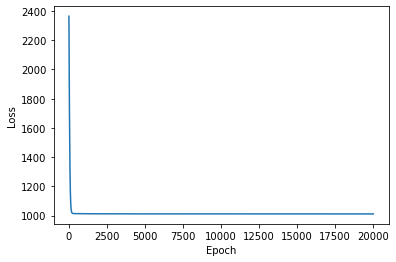

In [35]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

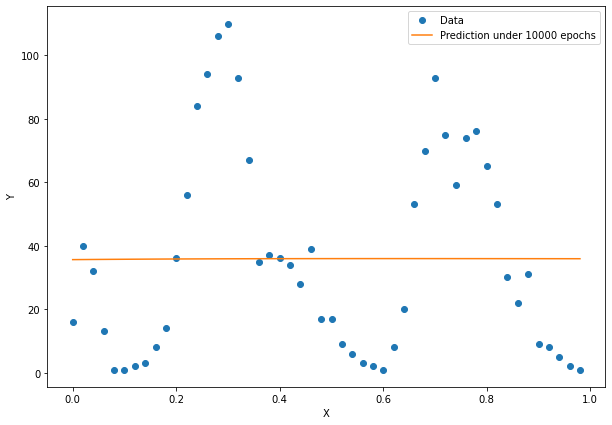

In [36]:
x_data = x.data.numpy()
plt.figure(figsize=(10, 7))
xplot, = plt.plot(x_data, y.data.numpy(), 'o')
yplot, = plt.plot(x_data, predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot, yplot], ['Data', 'Prediction under 10000 epochs'])
plt.show()